### LIF:

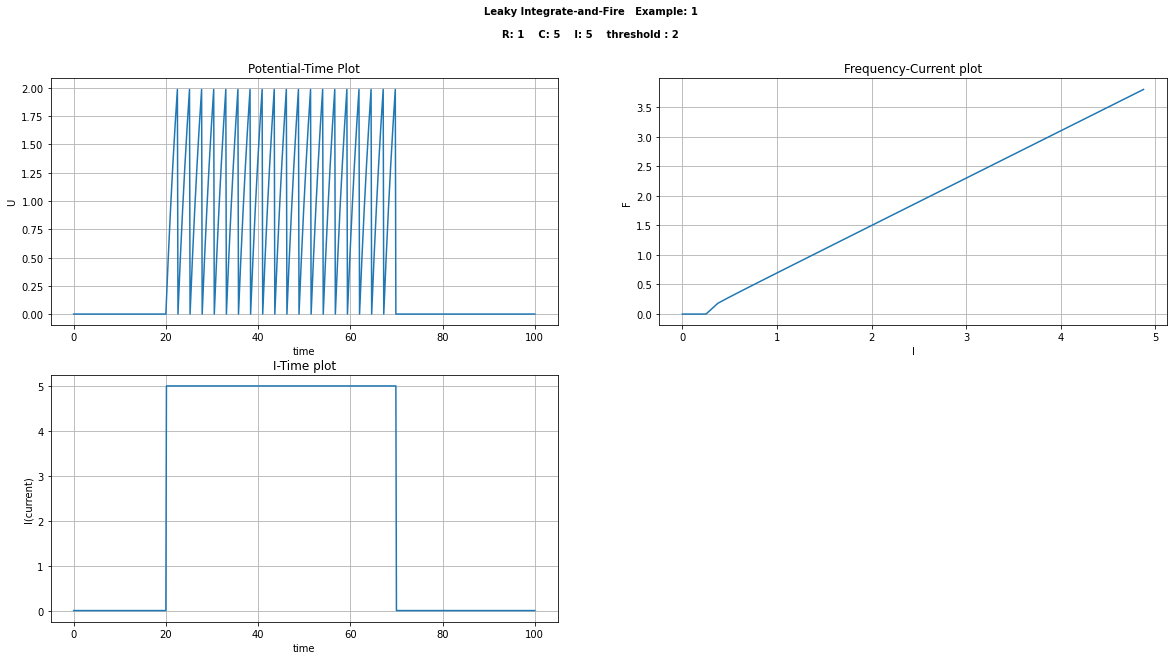

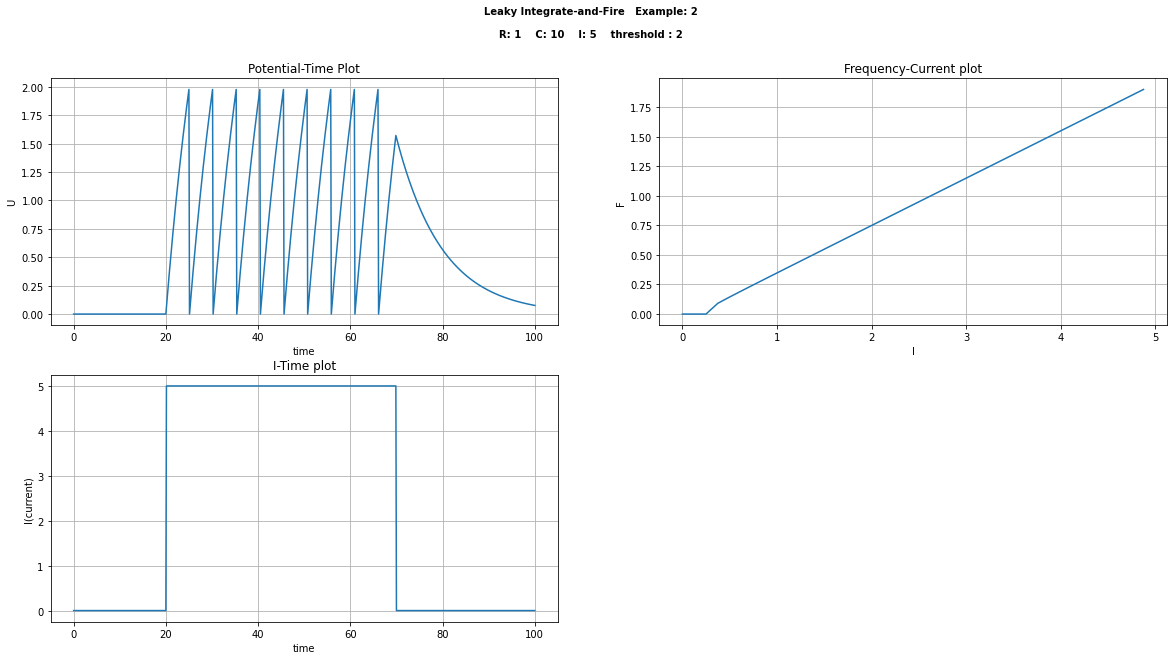

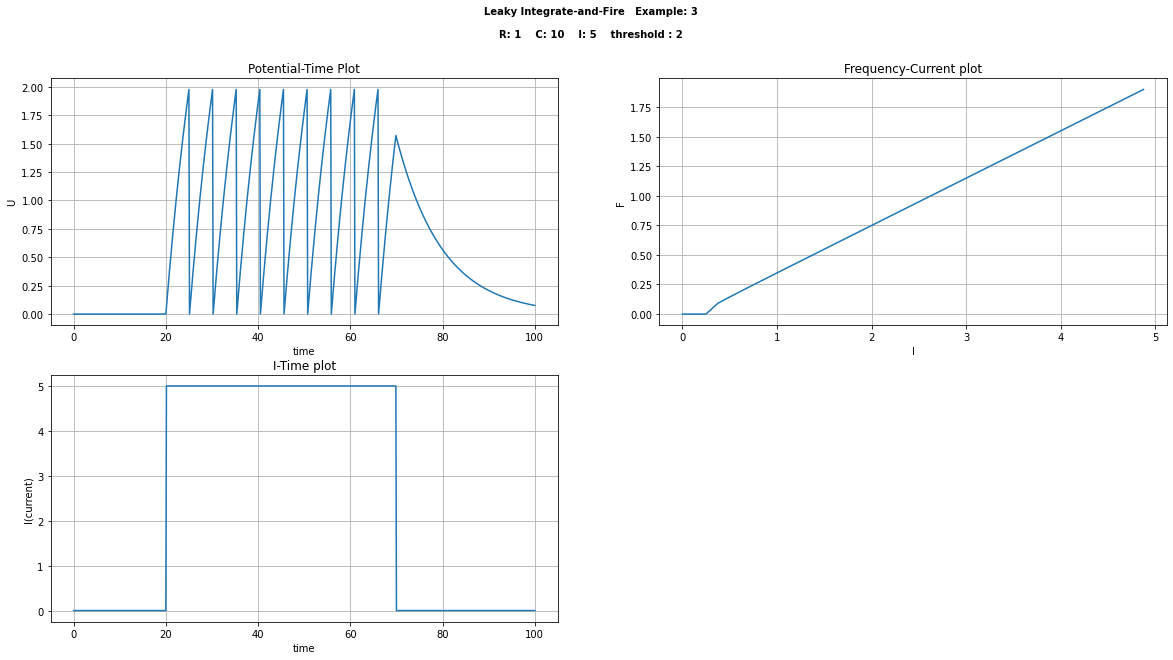

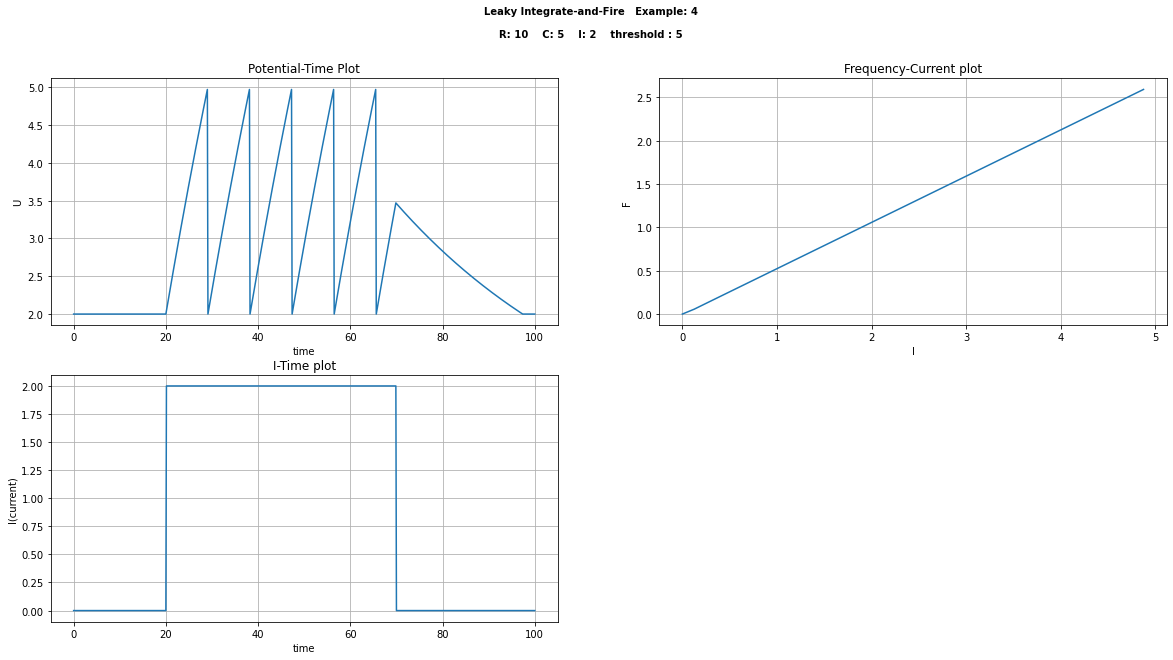

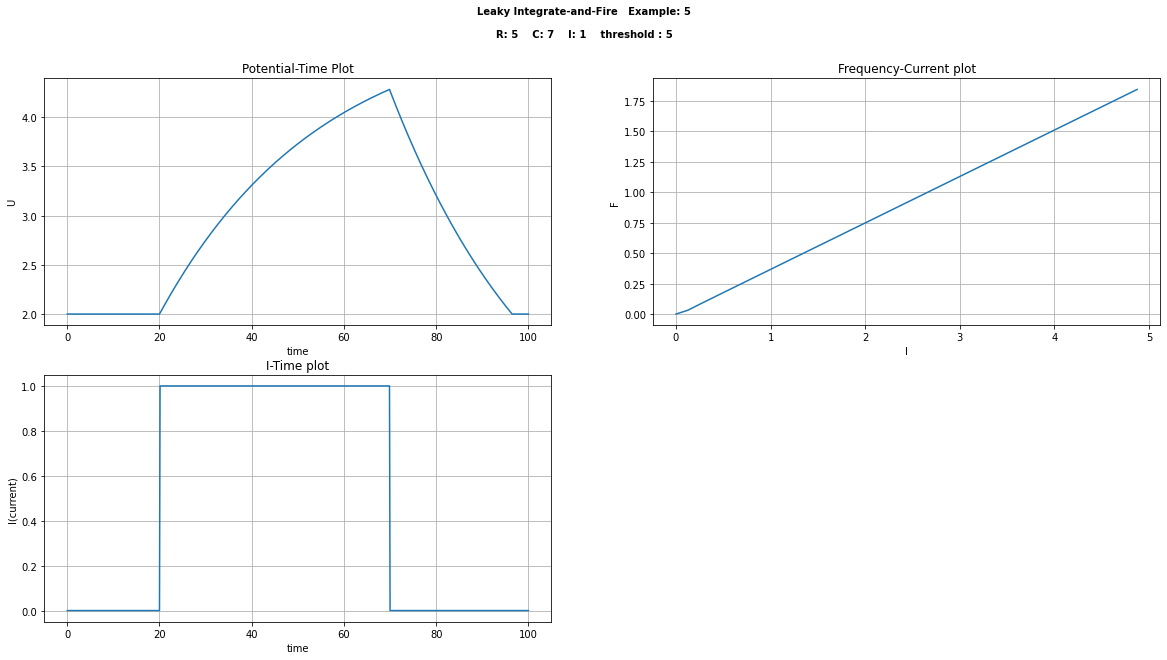

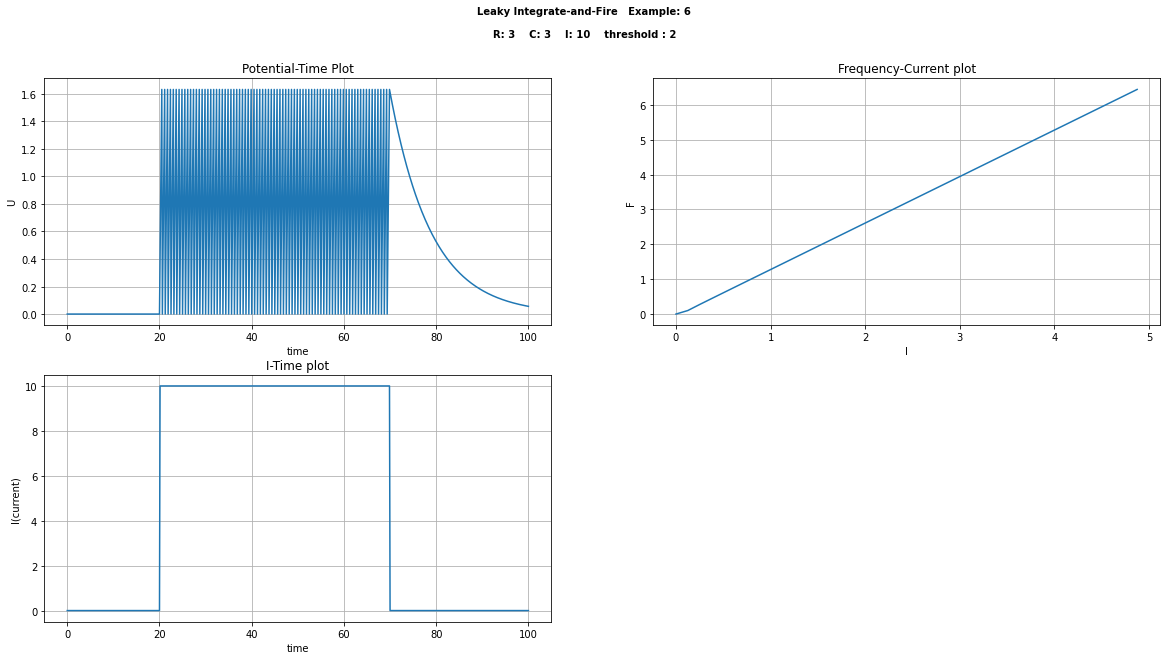

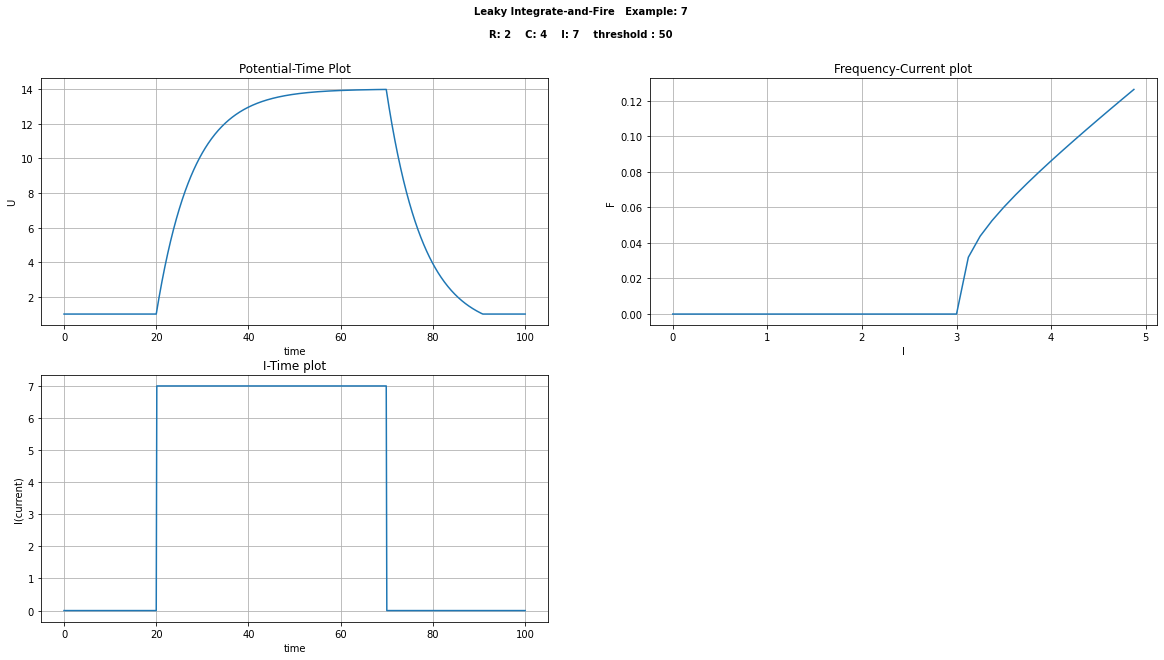

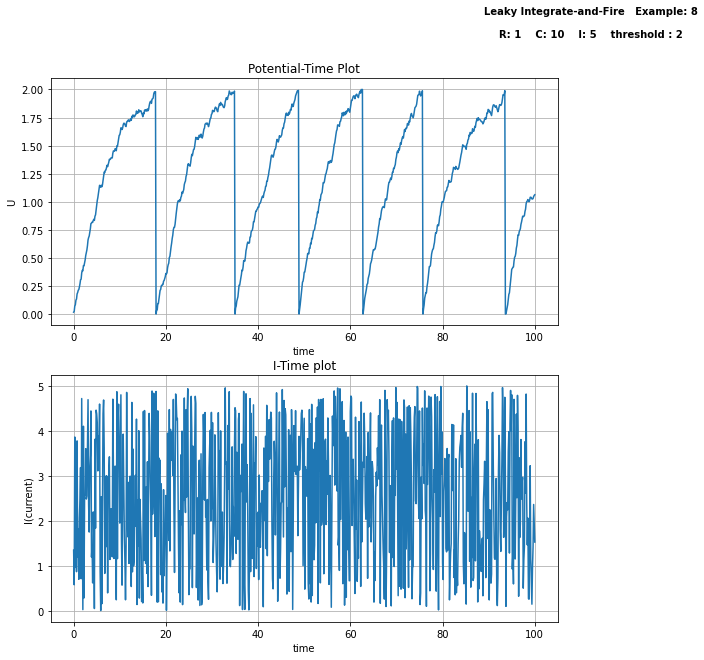

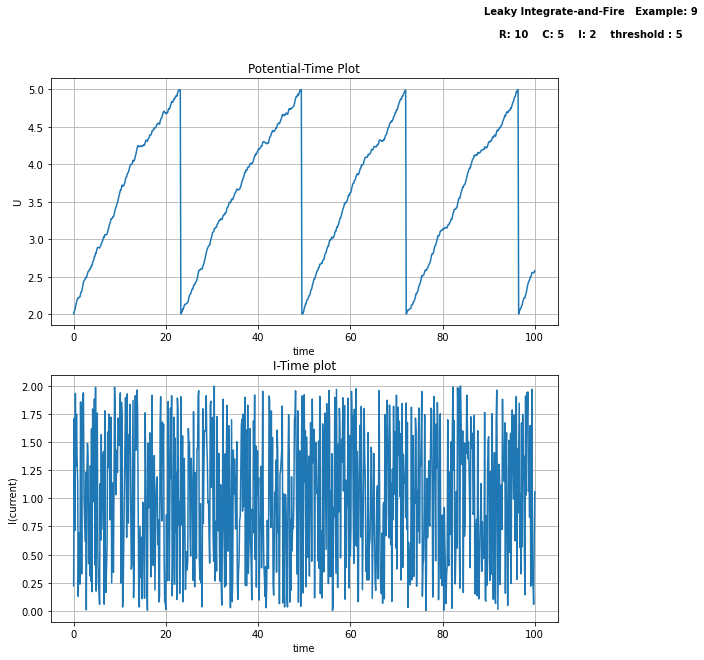

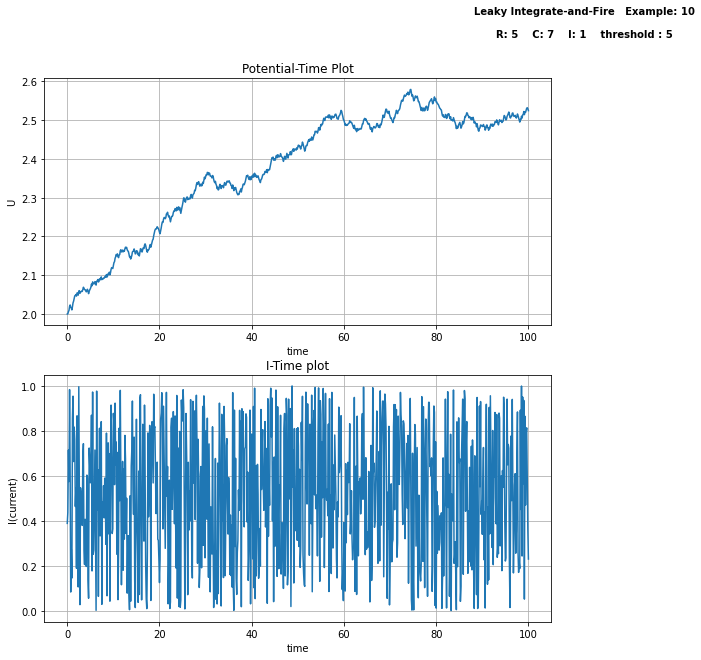

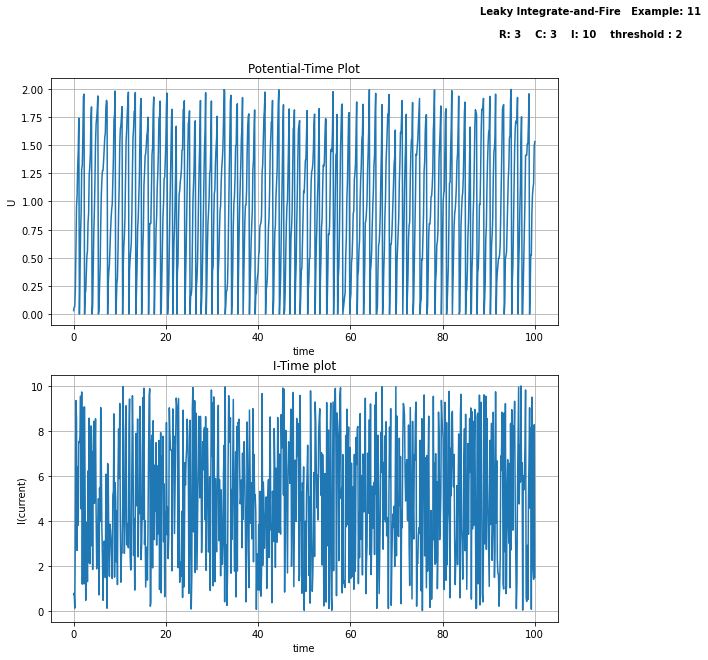

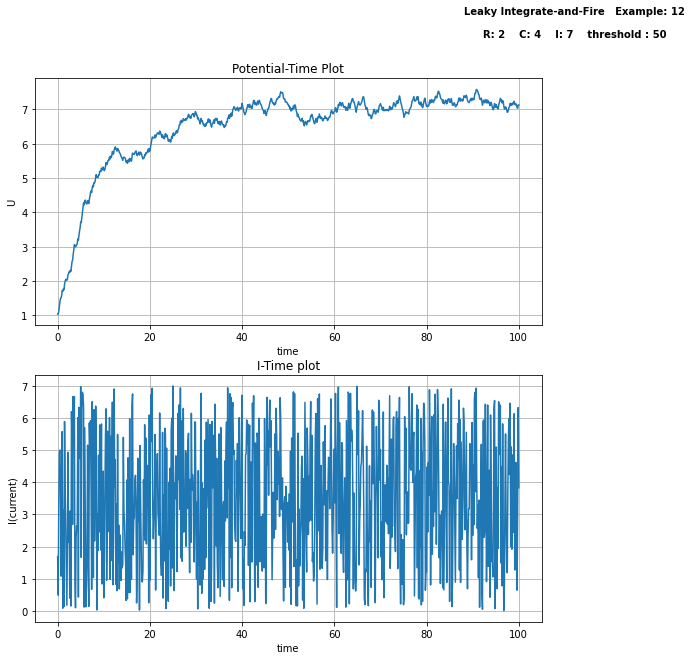

In [22]:
import numpy as np
from matplotlib.pyplot import *
import random
import math


def show_matplotlyb(sub, x, y, x_label, y_label, title):
    matplotlib.pyplot.subplot(sub)
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.xlabel(x_label)
    matplotlib.pyplot.ylabel(y_label)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.grid(True)

def i_zero_one(x, i):
    if 20 < x < 70:
        return i
    return 0

def rand_i(x, i):
    return random.random() * i


# τ .(du/dt) = -(U(t) - U_rest) + R.I_const(t)
           #if u(t) => Threshold  then  Fire + Reset ( u = u reset )

def LIF_MODEL(dt=0.125, time=100, current_func=i_zero_one, u_rest=0,
              R=1, C=10, I=5, thre=2, frequency_current_modeling=False, num = 1):
    t = np.arange(0, time + dt, dt)
    tha = R * C
    U = [u_rest] * len(t)
    #        ____________
    #       |            |
    # ______|            |________
    current_input = [current_func(j, I) for j in t]

    for j in range(len(t)):
        U[j] = U[j - 1] + (-U[j - 1] + R * current_input[j]) / tha * dt
        if U[j] >= thre or U[j] < u_rest:
            U[j] = u_rest

    # plotting
    figuree = figure(num=None, figsize=(20, 10))
    figuree.suptitle('Leaky Integrate-and-Fire   ' + "Example: " + str(num) + "\n\nR: " + str(R)
                     + "    C: " + str(C) + "    I: " + str(I)
                     + "    threshold : " + str(thre), fontsize=10, fontweight='bold')
    show_matplotlyb(221, t, U, "time", "U", "Potential-Time Plot")
    show_matplotlyb(223, t, current_input, "time", "I(current)", "I-Time plot")


    if frequency_current_modeling:
        current_fi   = np.arange(0, 5, 0.125)
        frequency_fi = [0] * len(current_fi)
        for j in range(len(current_fi)):
            try:
                frequency_fi[j] = 1 / (-1 * tha * (math.log(1 - (thre - u_rest) / (R * j))))
            except:
                frequency_fi[j] = 0
        show_matplotlyb(222, current_fi, frequency_fi, "I", "F", "Frequency-Current plot")

    show()


LIF_MODEL(u_rest=0, R=1, C=5, I=5, thre=2, frequency_current_modeling=True, num = 1)
LIF_MODEL(u_rest=0, R=1, C=10, I=5, thre=2, frequency_current_modeling=True, num = 2)
LIF_MODEL(u_rest=0, R=1, C=10, I=5, thre=2, frequency_current_modeling=True, num = 3)
LIF_MODEL(u_rest=2, R=10, C=5, I=2, thre=5, frequency_current_modeling=True, num = 4)
LIF_MODEL(u_rest=2, R=5, C=7, I=1, thre=5, frequency_current_modeling=True, num = 5)
LIF_MODEL(u_rest=0, R=3, C=3, I=10, thre=2, frequency_current_modeling=True, num = 6)
LIF_MODEL(u_rest=1, R=2, C=4, I=7, thre=50, frequency_current_modeling=True, num = 7)

LIF_MODEL(u_rest=0, R=1, C=10, I=5, thre=2, current_func=rand_i, num = 8)
LIF_MODEL(u_rest=2, R=10, C=5, I=2, thre=5, current_func=rand_i, num = 9)
LIF_MODEL(u_rest=2, R=5, C=7, I=1, thre=5, current_func=rand_i, num = 10)
LIF_MODEL(u_rest=0, R=3, C=3, I=10, thre=2, current_func=rand_i, num = 11)
LIF_MODEL(u_rest=1, R=2, C=4, I=7, thre=50, current_func=rand_i, num = 12)

### ALIF:

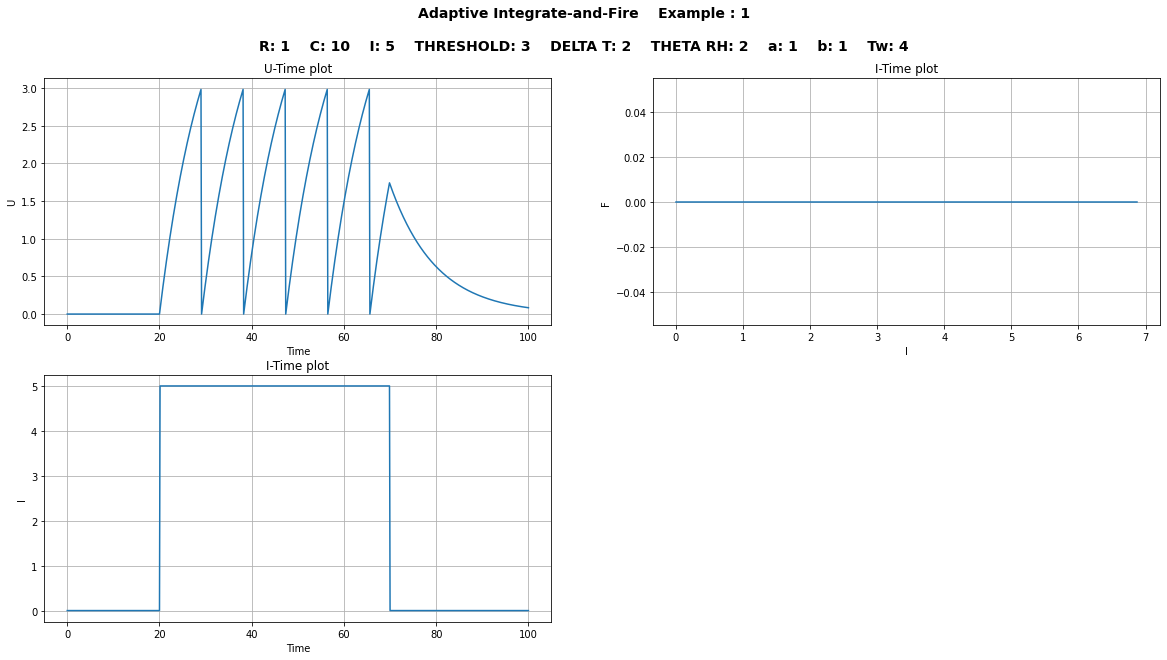

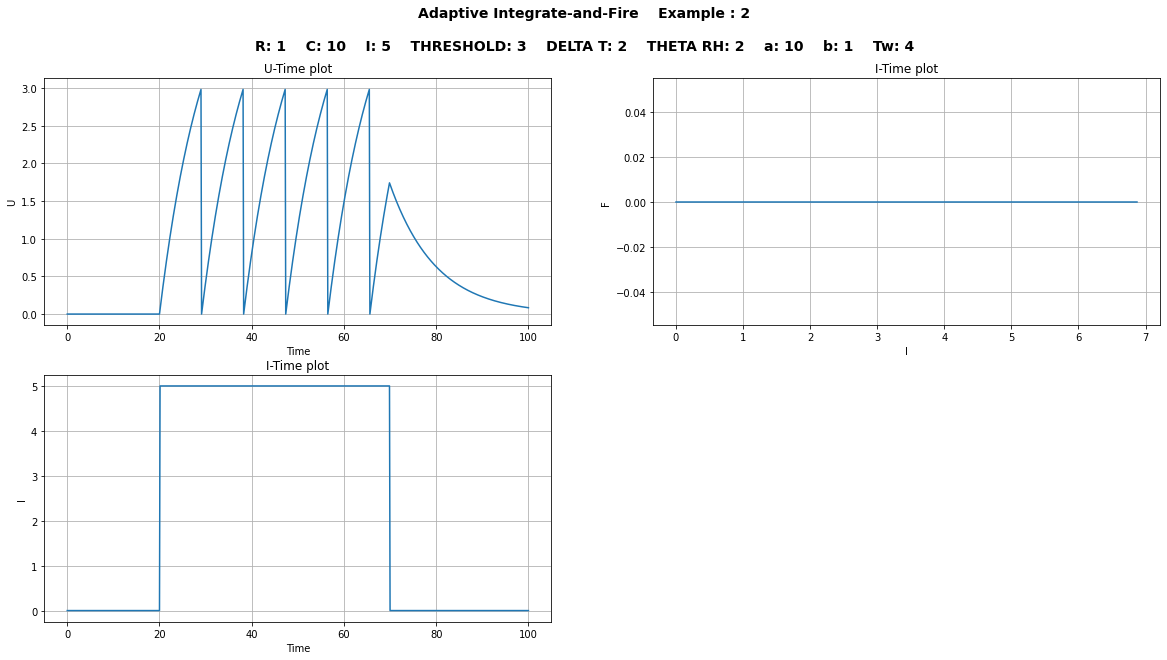

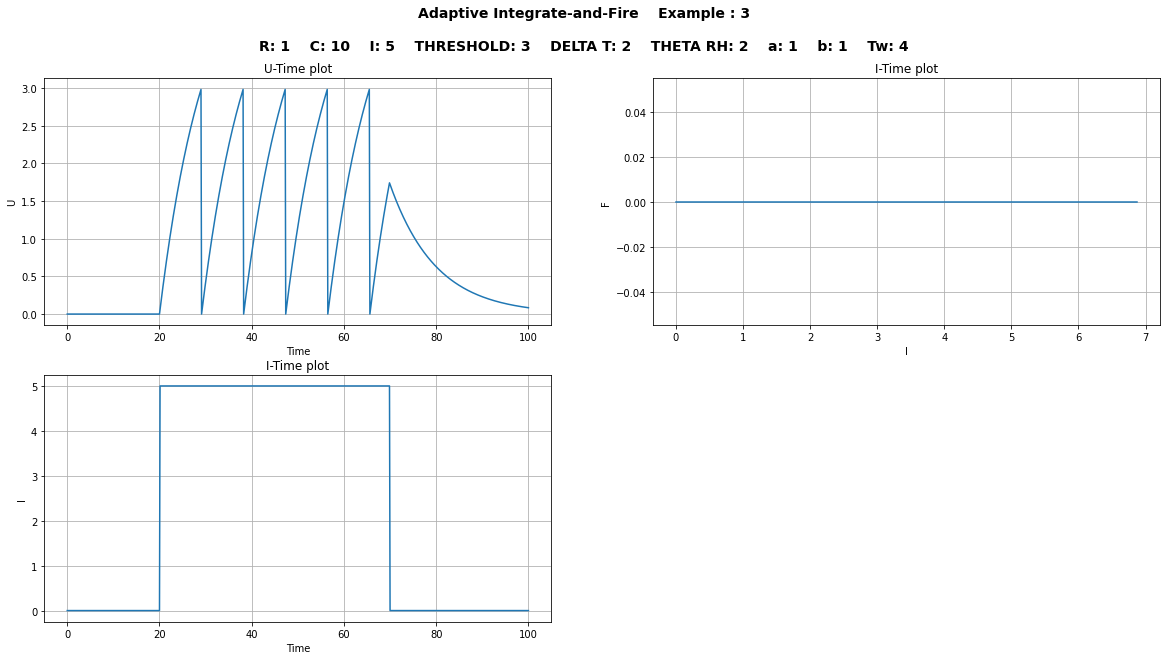

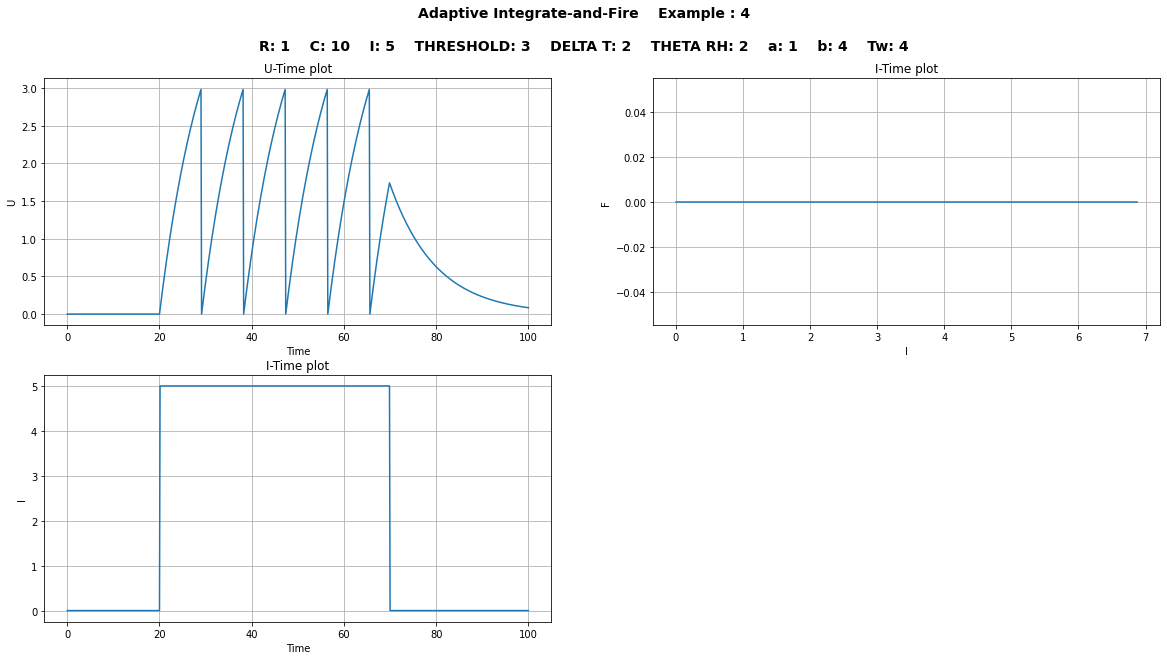

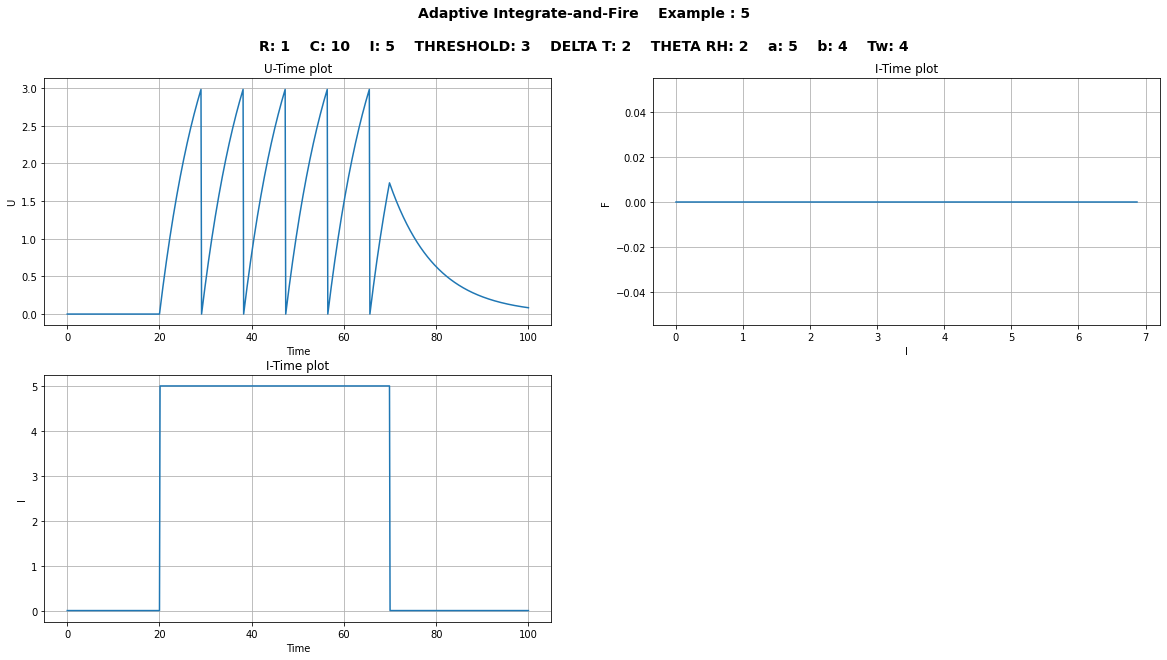

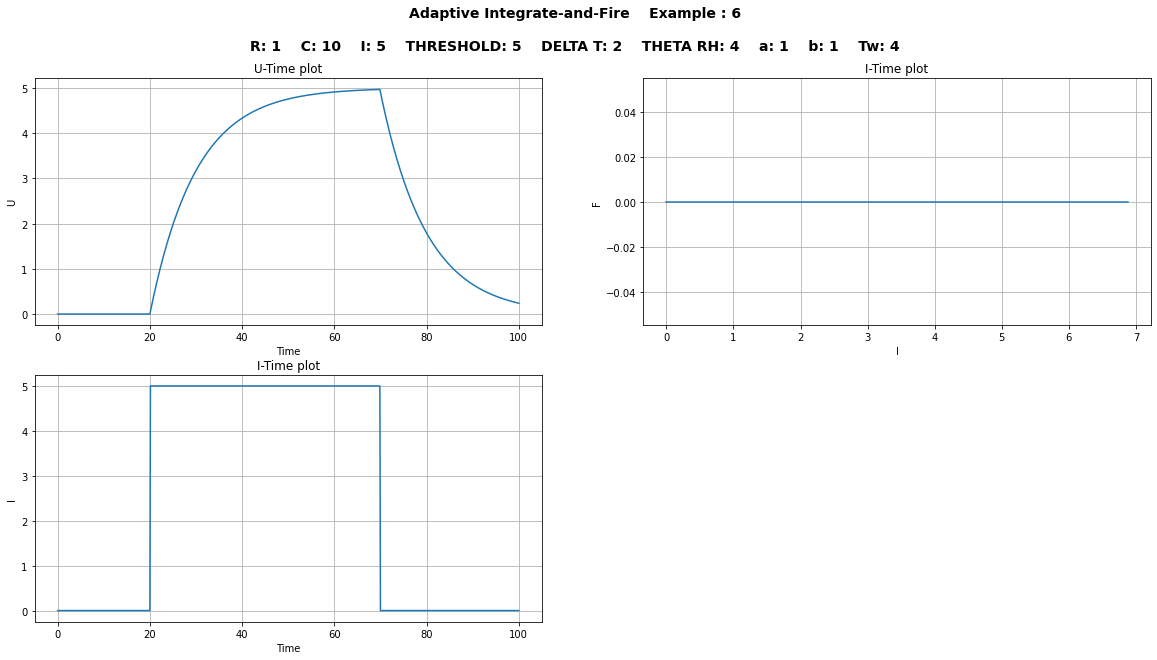

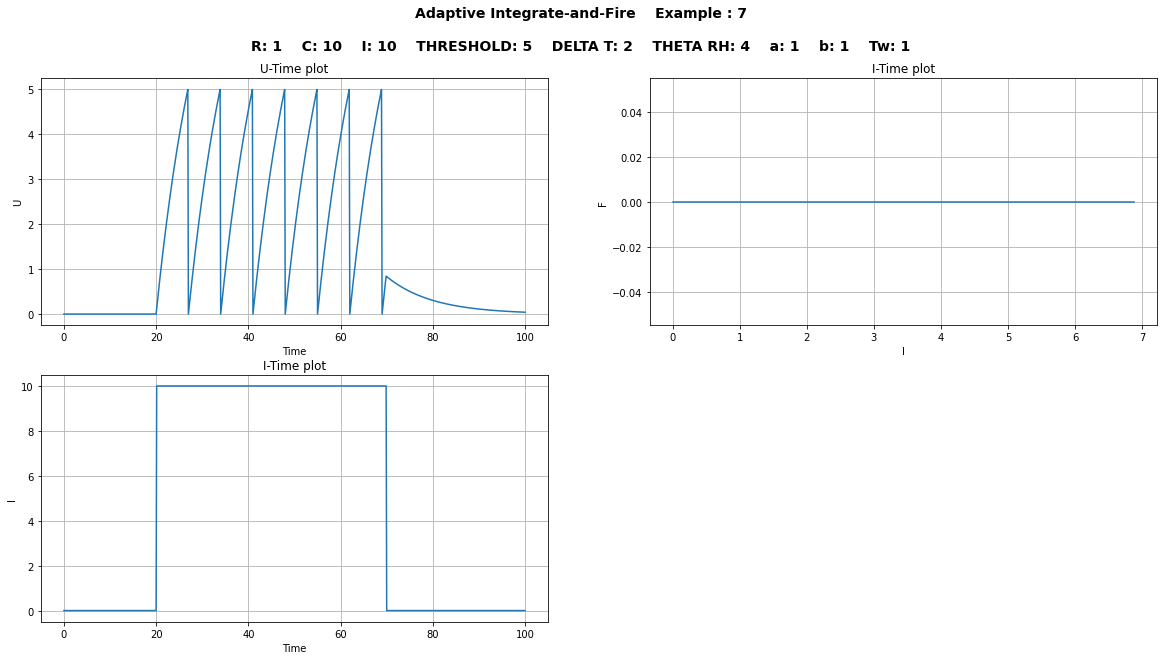

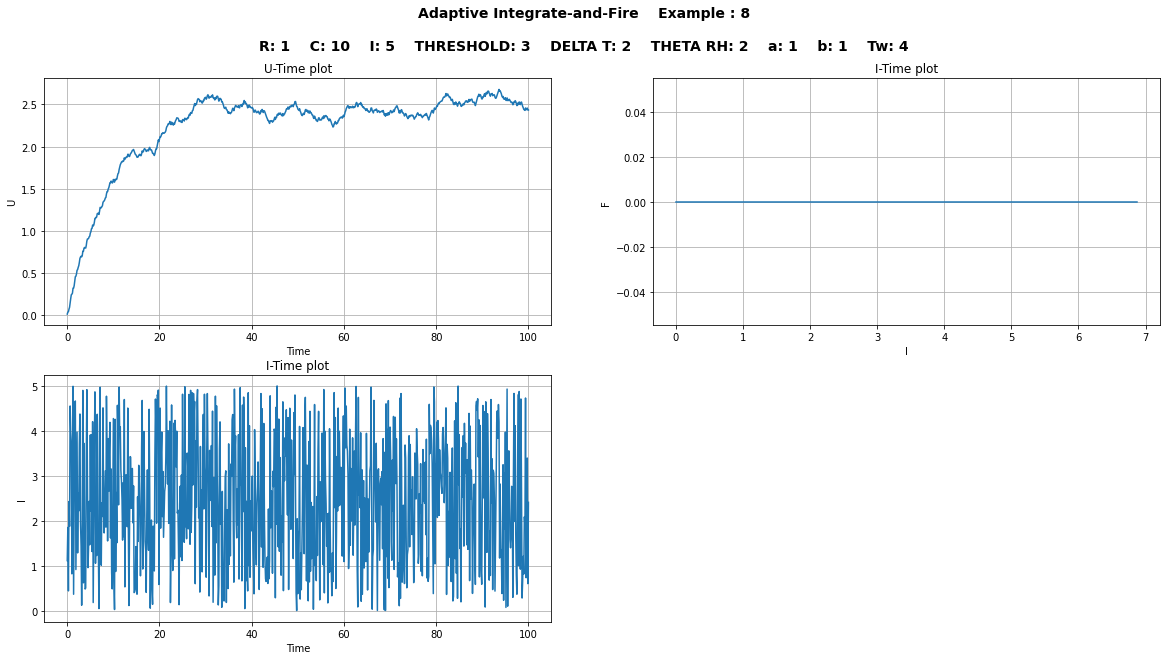

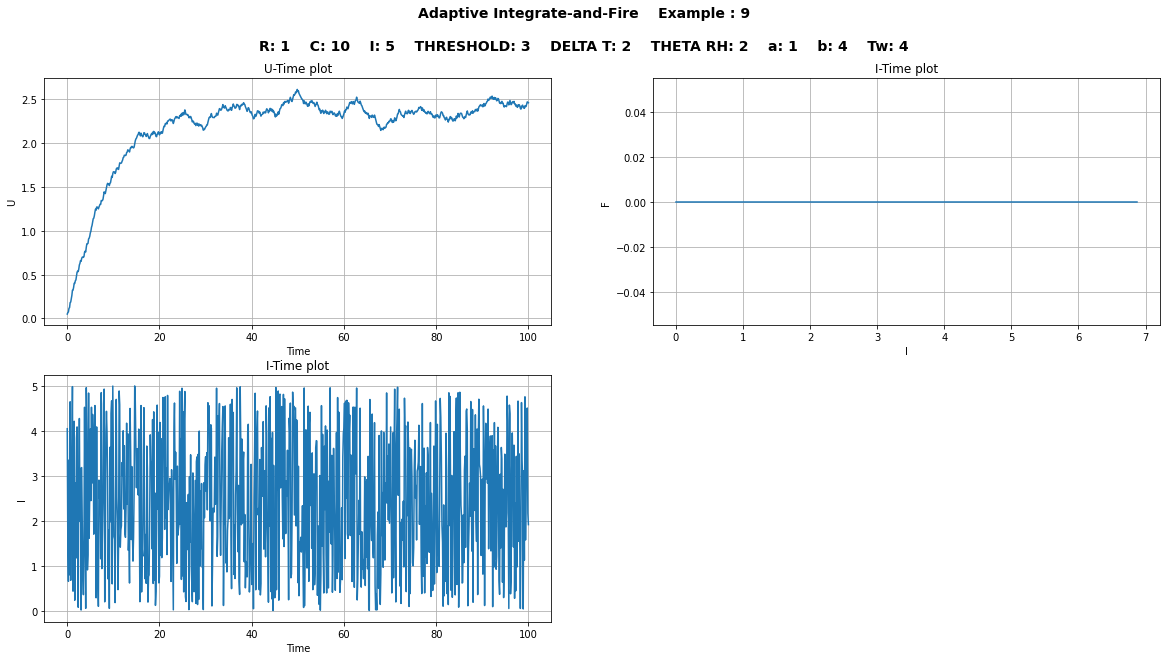

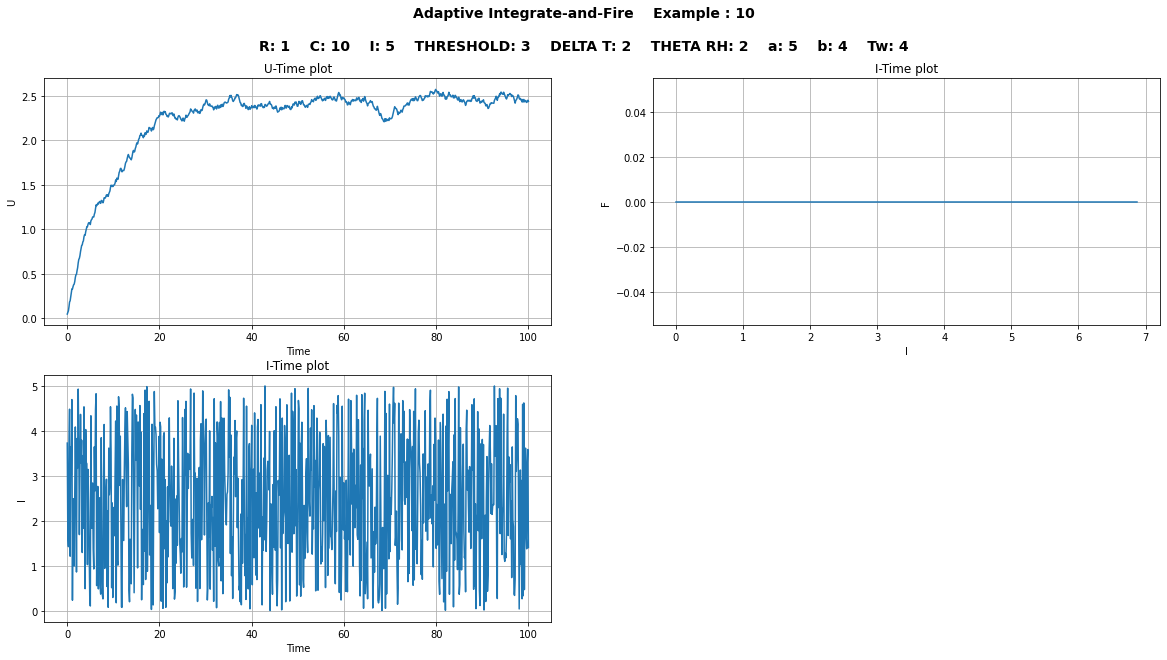

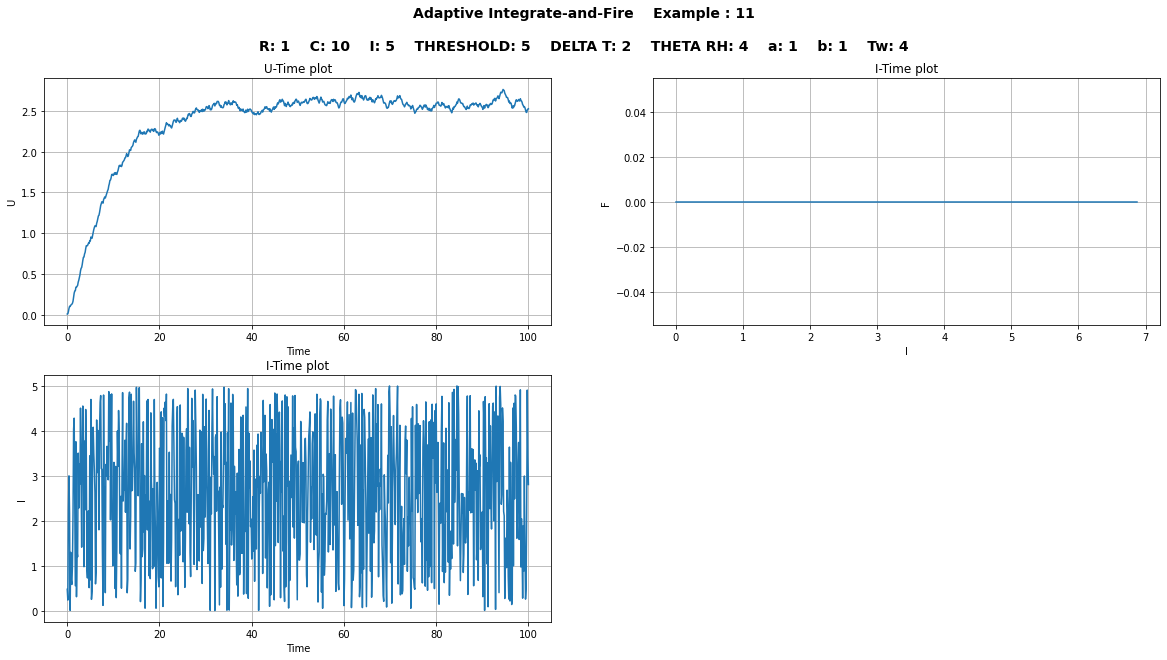

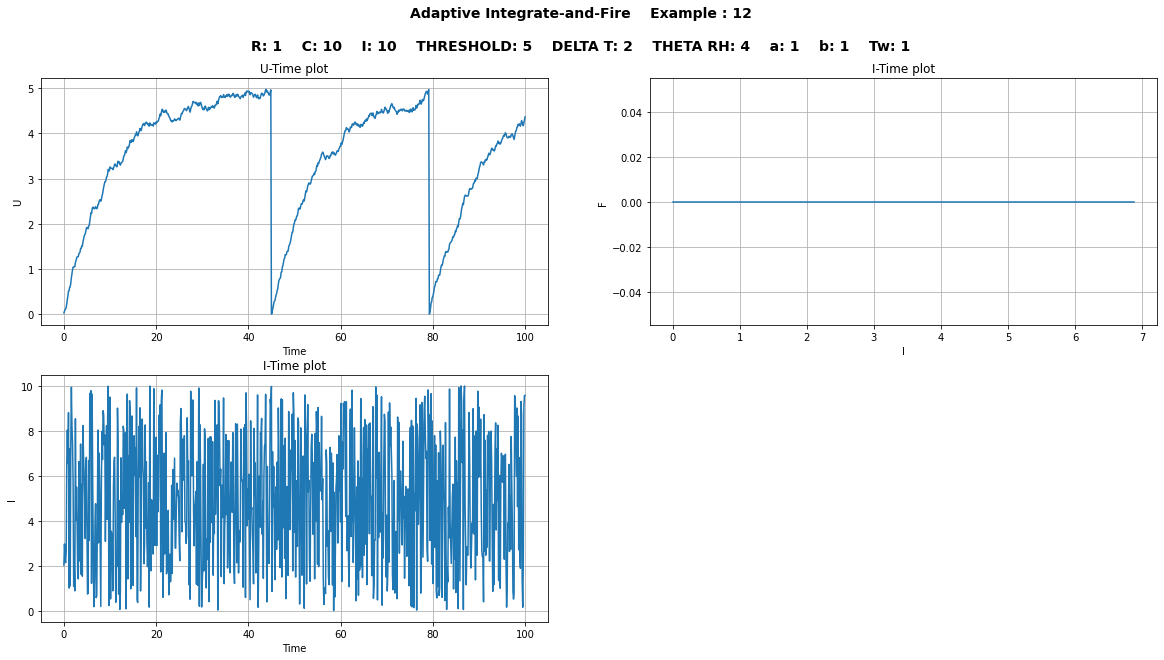

34.25

In [23]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

def show_matplotlyb(sub, x, y, x_label, y_label, title):
    matplotlib.pyplot.subplot(sub)
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.xlabel(x_label)
    matplotlib.pyplot.ylabel(y_label)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.grid(True)

def i_current(x, i):
    if 20 < x < 70:
        return i
    return 0

def rand_i(x, i):
    return random.random() * i

def ALIF(time=100, dt=0.125, current_func=i_current, u_rest=0,
         r=1, c=10, i=5, threshold=3, delta_t=2, theta_rh=2,
         a=2, b=2, tw=5, frequency_current_plot=False, draw_plot=True, num=1):
    timer = np.arange(0, time + dt, dt)
    tm = r * c
    u = [u_rest] * len(timer)
    w = [0] * len(timer)
    i_input = [current_func(j, i) for j in timer]
    zigma_delta_funciton = 0

    sp_t = time
    current_spike_time = 0

    for j in range(len(timer)):
        u[j] = u[j - 1] + (-u[j - 1] + r * i_input[j]) / tm * dt
        w[j] = w[j - 1] + (a * u[j - 1] - w[j - 1] + b * tw * zigma_delta_funciton) / tw * dt
        if u[j] >= threshold or u[j] < u_rest:
            u[j] = u_rest
            zigma_delta_funciton += 1
            prev_spike_time = current_spike_time
            current_spike_time = timer[j]
            sp_t = min(sp_t, current_spike_time - prev_spike_time)

    if draw_plot:
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Adaptive Integrate-and-Fire' +"    Example : " + str(num) + "\n\n" +"R: " + str(r) + "    C: " + str(c) + "    I: " + str(i)
                     + "    THRESHOLD: " + str(threshold) + "    DELTA T: " + str(delta_t)
                     + "    THETA RH: " + str(theta_rh) + "    a: " + str(a) + "    b: " + str(b) + "    Tw: " + str(tw)+"\n\n",
                     fontsize=14, fontweight='bold', )
        show_matplotlyb(221, timer, u, 'Time', 'U', 'U-Time plot')
        show_matplotlyb(223, timer,  i_input, 'Time', 'I', 'I-Time plot')




        if frequency_current_plot:
            currents = np.arange(0, 7, 0.125)
            frequencys = [0] * len(currents)
            for j in range(len(currents)):
                try:
                    frequencys[j] = 1 / ALIF(time=time, dt=dt, current_func=current_func, u_rest=u_rest, r=r, c=c, i=currents[j], a=a, b=b, tw=tw,
                                             threshold=threshold, delta_t=delta_t, theta_rh=theta_rh, frequency_current_plot=False,
                                             save_name="none",
                                             draw_plot=False)
                except:
                    frequencys[j] = 0
            show_matplotlyb(222, currents,frequencys,'I','F', 'I-Time plot')

            grid(True)

        show()

    return sp_t


ALIF(a=1, b=1, tw=4, frequency_current_plot=True, num=1)
ALIF(a=10, b=1, tw=4,  frequency_current_plot=True, num=2)
ALIF(a=1, b=1, tw=4,  frequency_current_plot=True, num=3)
ALIF(a=1, b=4, tw=4,  frequency_current_plot=True, num=4)
ALIF(a=5, b=4, tw=4,  frequency_current_plot=True, num=5)
ALIF(threshold=5, theta_rh=4, a=1, b=1, tw=4, frequency_current_plot=True, num=6)
ALIF(threshold=5, theta_rh=4, i=10, a=1, b=1, tw=1, frequency_current_plot=True, num=7)

ALIF(a=1, b=1, tw=4, current_func=rand_i, frequency_current_plot=True, num=8)
ALIF(a=1, b=4, tw=4, current_func=rand_i, frequency_current_plot=True, num=9)
ALIF(a=5, b=4, tw=4, current_func=rand_i,frequency_current_plot=True, num=10)
ALIF(threshold=5, theta_rh=4, a=1, b=1, tw=4, current_func=rand_i,frequency_current_plot=True, num=11)
ALIF(threshold=5, theta_rh=4, i=10, a=1, b=1, tw=1, current_func=rand_i,frequency_current_plot=True, num=12)

### AELIF:

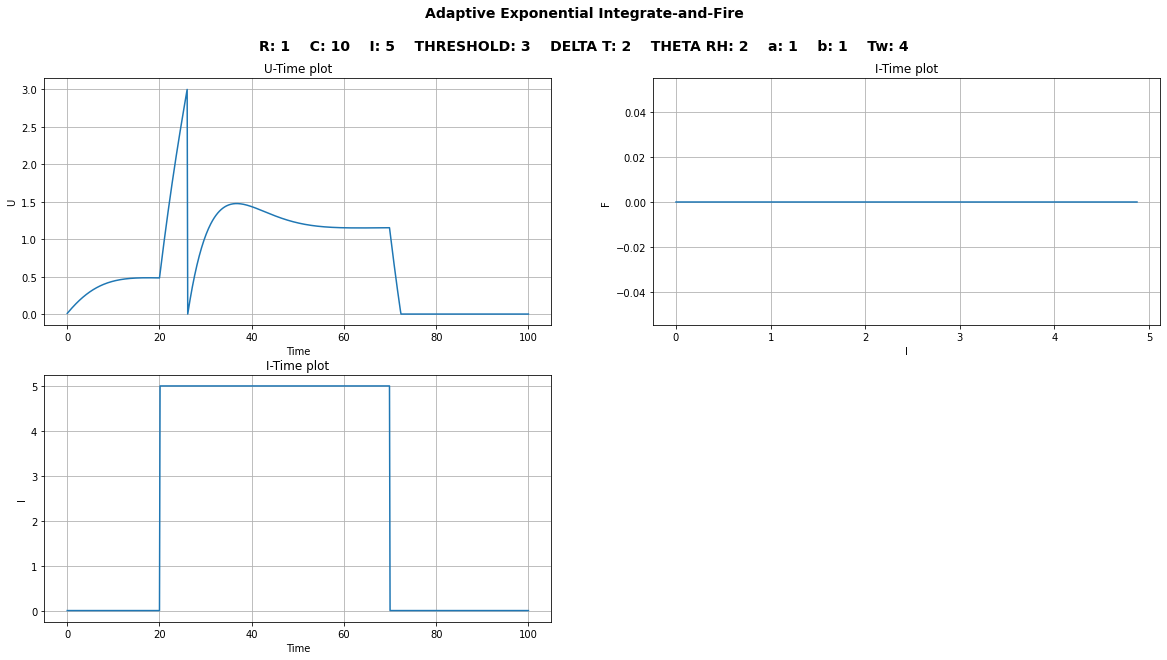

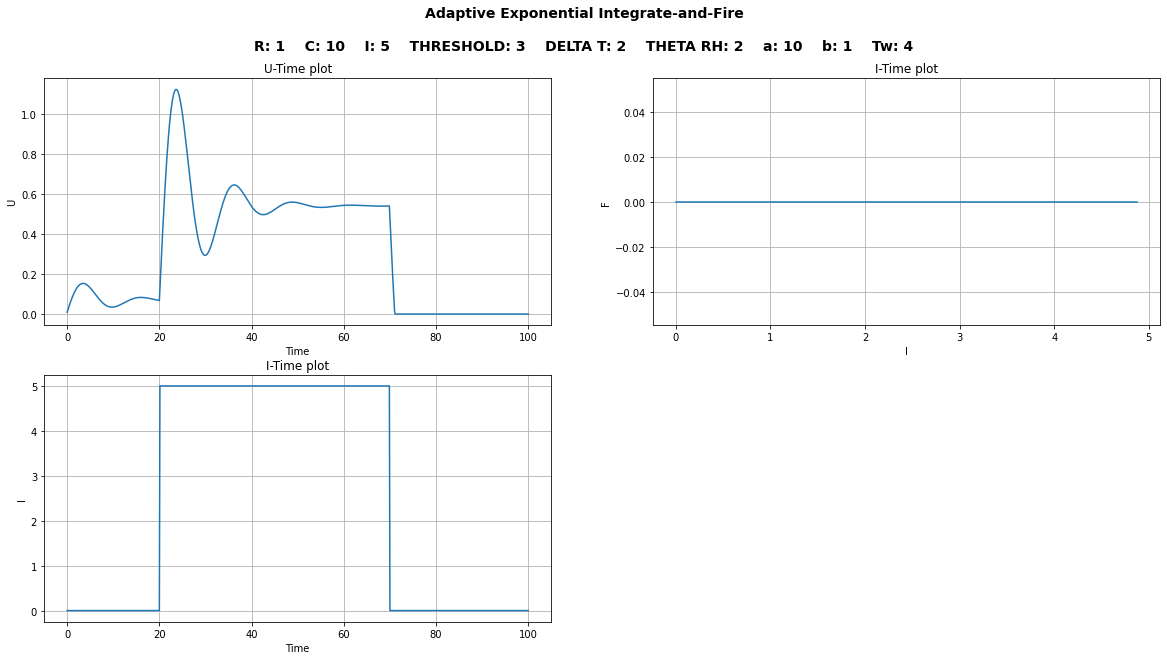

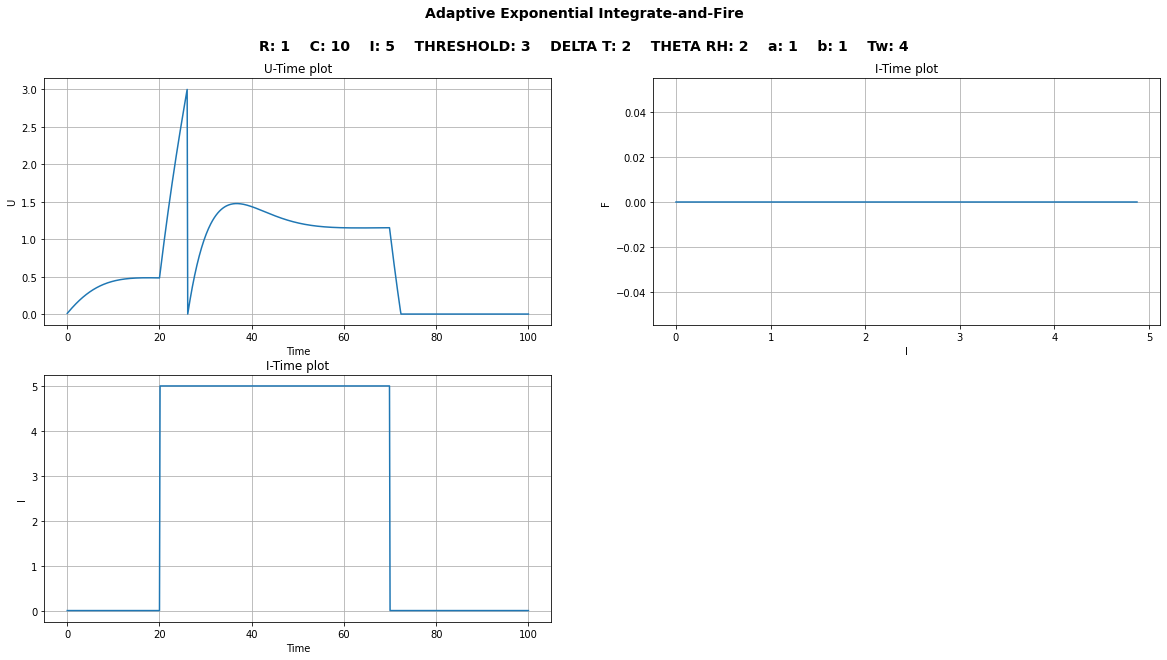

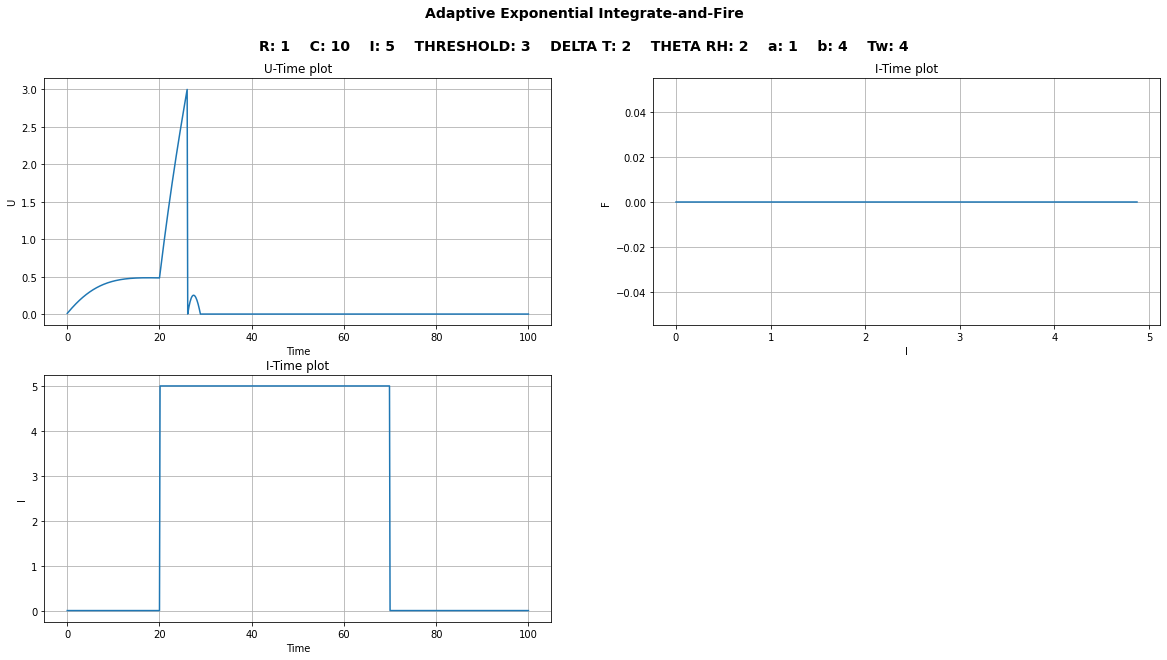

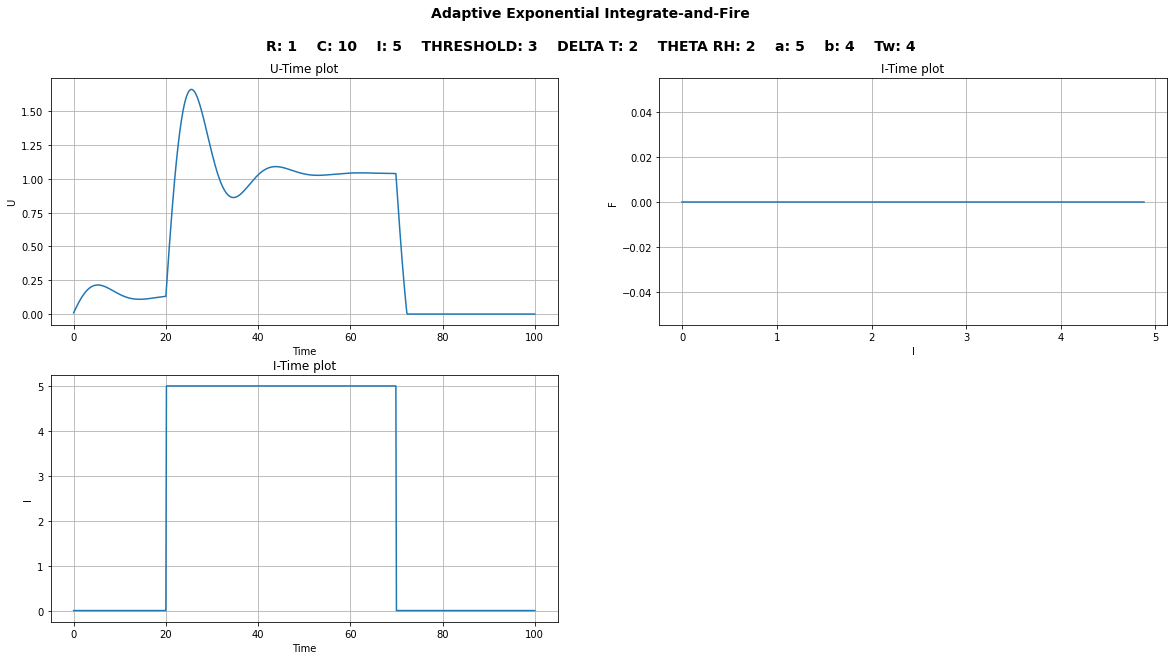

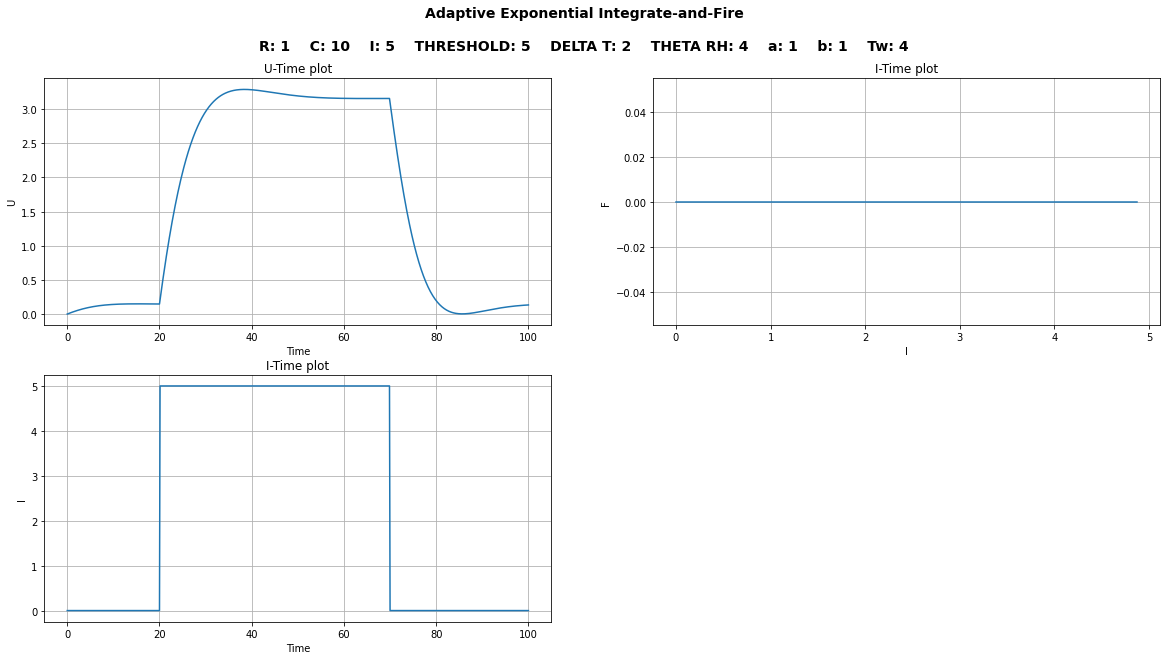

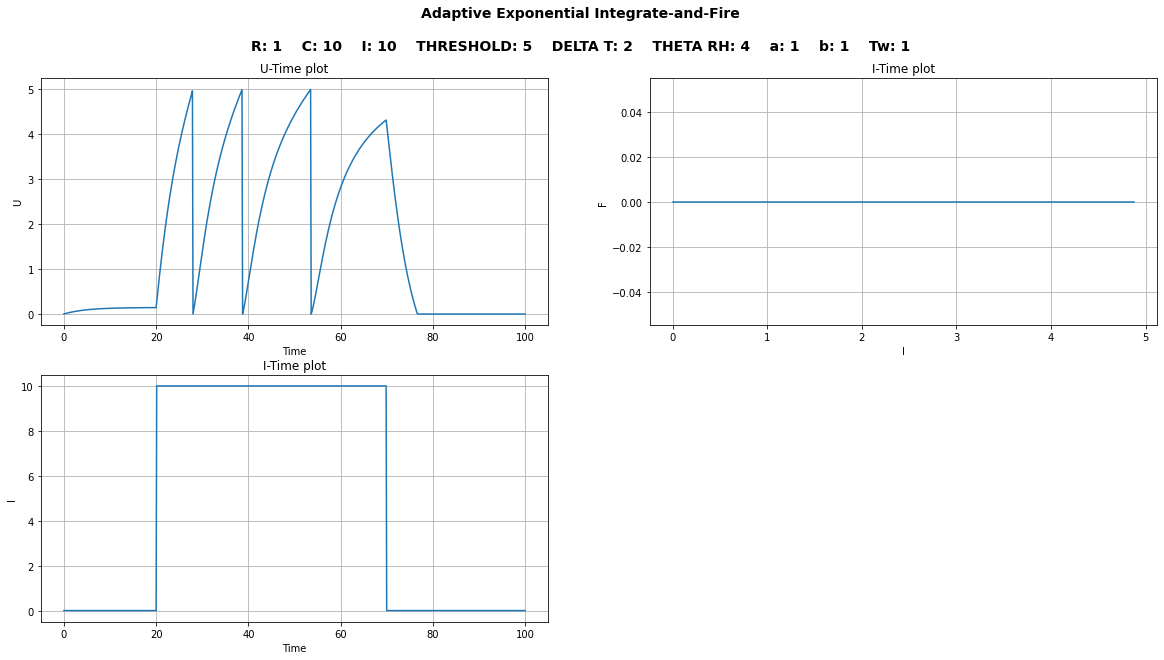

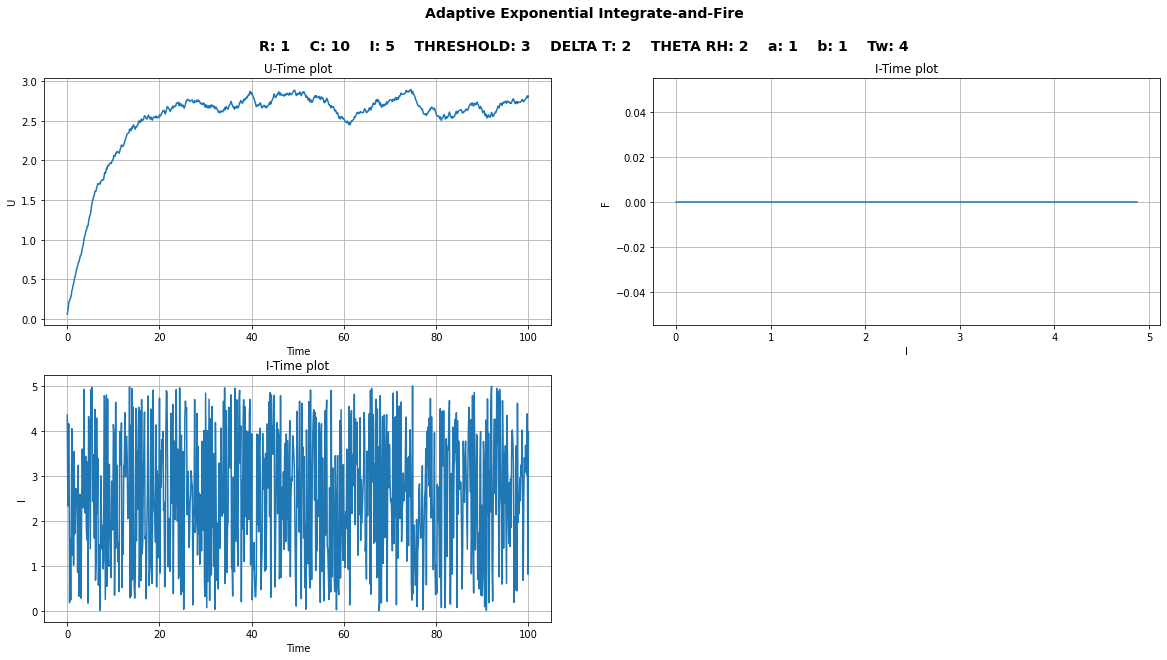

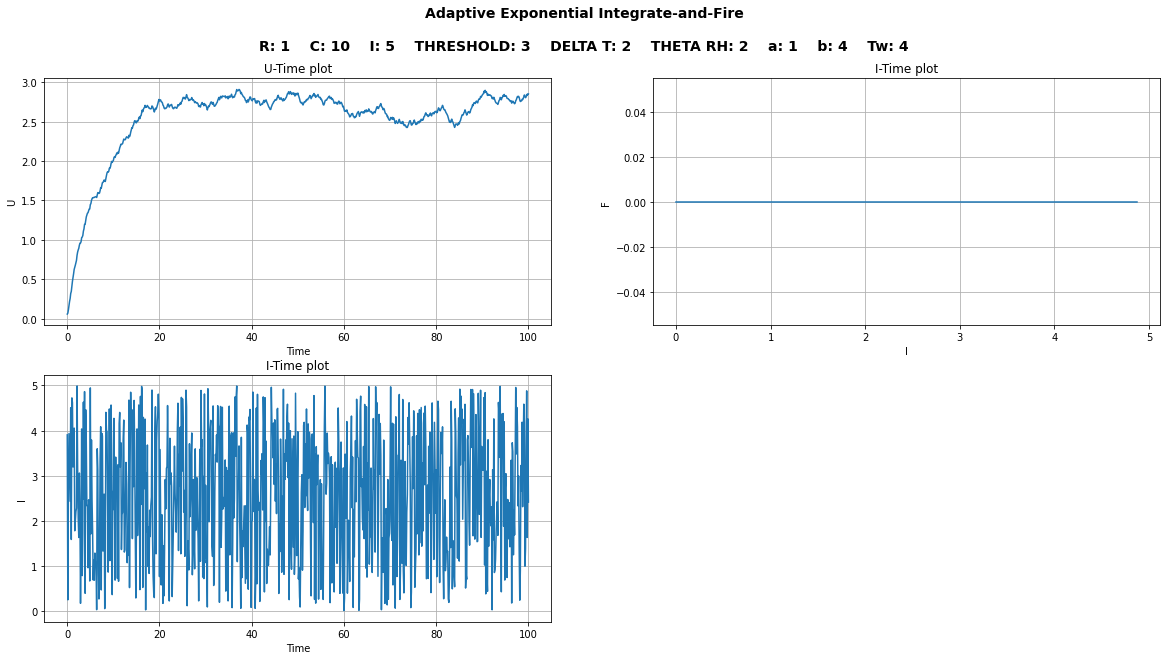

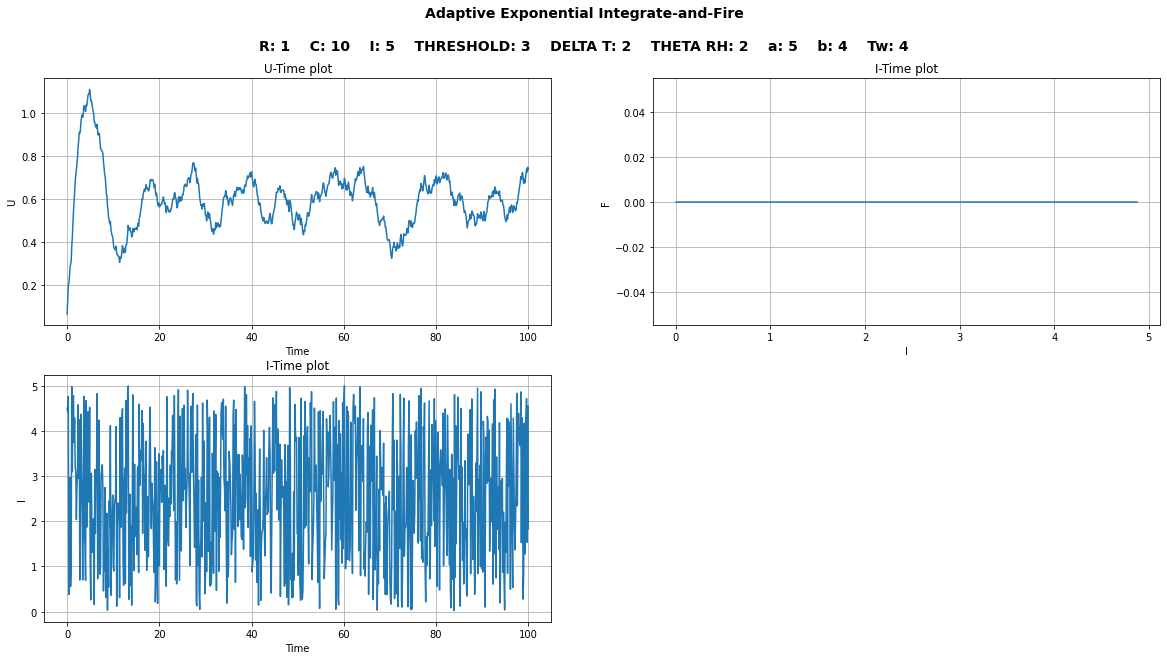

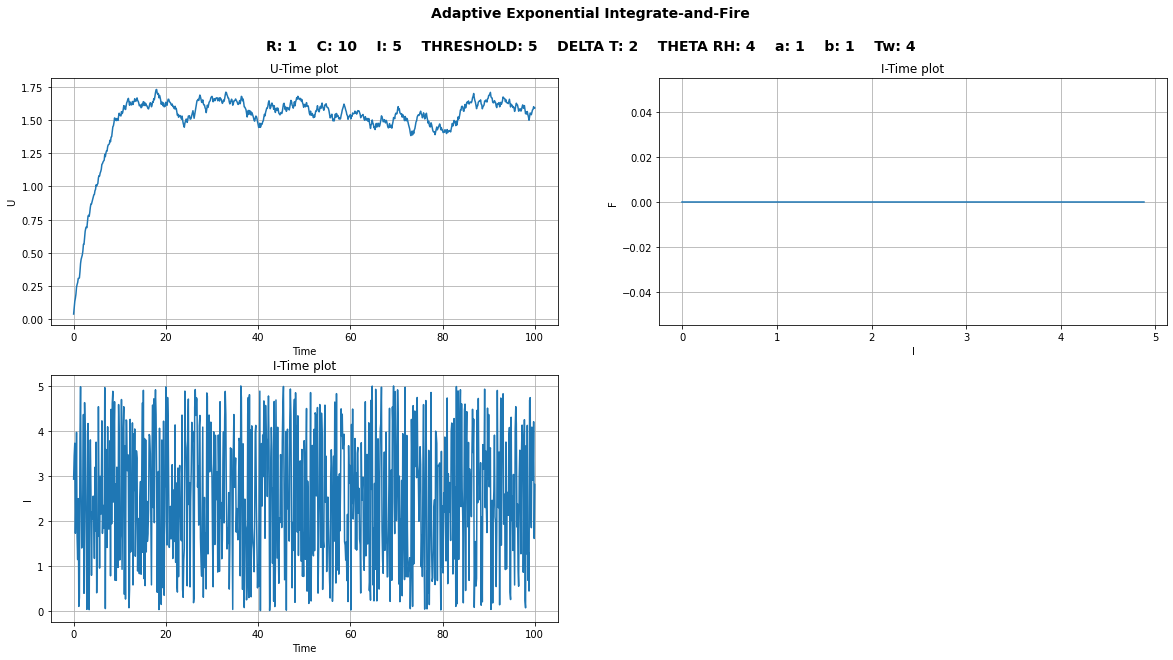

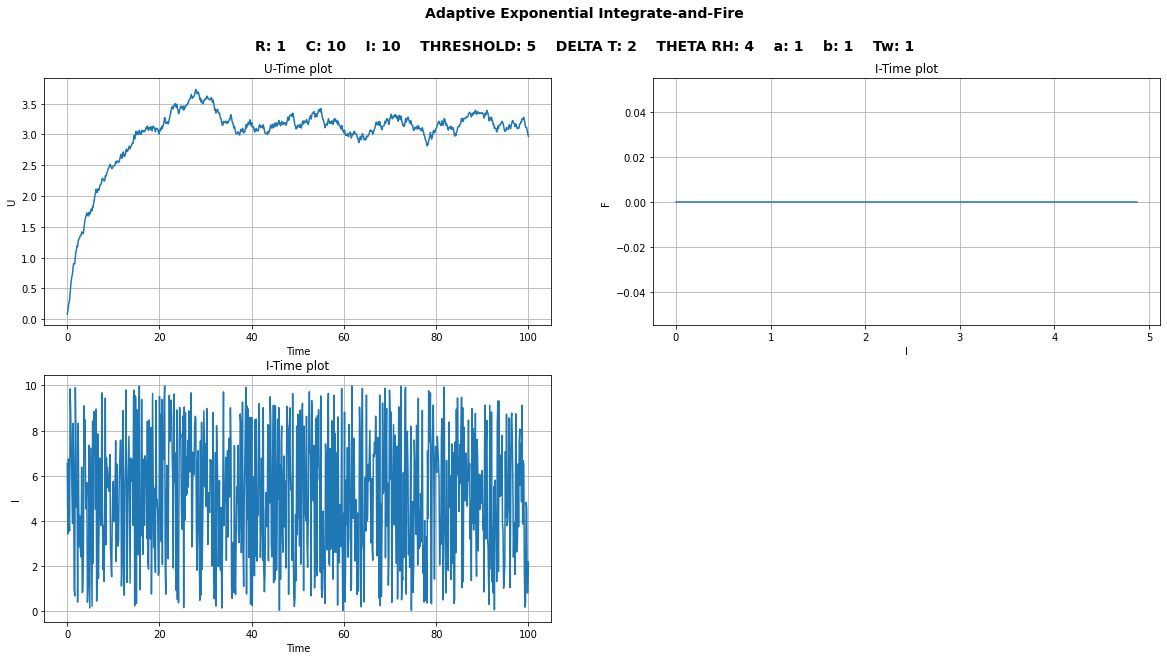

100

In [24]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

def show_matplotlyb(sub, x, y, x_label, y_label, title):
    matplotlib.pyplot.subplot(sub)
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.xlabel(x_label)
    matplotlib.pyplot.ylabel(y_label)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.grid(True)

def i_current(x, i):
    if 20 < x < 70:
        return i
    return 0

def rand_i(x, i):
    return random.random() * i

def AELIF(time=100, dt=0.125, current_func=i_current, u_rest=0,
          r=1, c=10, i=5, threshold=3, delta_t=2, theta_rh=2,
          a=2, b=2, tw=5, frequency_current_plot=False, draw_plot=True):
    timer = np.arange(0, time + dt, dt)
    tm = r * c
    u = [u_rest] * len(timer)
    w = [0] * len(timer)
    i_input = [current_func(j, i) for j in timer]
    zigma_delta_funciton = 0

    sp_t = time
    current_spike_time = 0

    for j in range(len(timer)):
        u[j] = u[j - 1] + (-u[j - 1] + r * i_input[j] + delta_t * math.exp((u[j - 1] - theta_rh) / delta_t) - r * w[j - 1]) / tm * dt
        w[j] = w[j - 1] + (a * u[j - 1] - w[j - 1] + b * tw * zigma_delta_funciton) / tw * dt
        if u[j] >= threshold or u[j] < u_rest:
            u[j] = u_rest
            zigma_delta_funciton += 1
            prev_spike_time = current_spike_time
            current_spike_time = timer[j]
            sp_t = min(sp_t, current_spike_time - prev_spike_time)

    # plotting
    if draw_plot:
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Adaptive Exponential Integrate-and-Fire\n\n' + "R: " + str(r) + "    C: " + str(c) + "    I: " + str(i)
                     + "    THRESHOLD: " + str(threshold) + "    DELTA T: " + str(delta_t)
                     + "    THETA RH: " + str(theta_rh) + "    a: " + str(a) + "    b: " + str(b) + "    Tw: " + str(tw),
                     fontsize=14, fontweight='bold')
        show_matplotlyb(221, timer, u, 'Time', 'U', 'U-Time plot')
        show_matplotlyb(223, timer,  i_input, 'Time', 'I', 'I-Time plot')




        if frequency_current_plot:
            currents = np.arange(0, 5, 0.125)
            frequencys = [0] * len(currents)
            for j in range(len(currents)):
                try:
                    frequencys[j] = 1 / AELIF(time=time, dt=dt, current_func=current_func, u_rest=u_rest, r=r, c=c, i=currents[j], a=a, b=b, tw=tw,
                                              threshold=threshold, delta_t=delta_t, theta_rh=theta_rh, frequency_current_plot=False,
                                              save_name="none",
                                              draw_plot=False)
                except:
                    frequencys[j] = 0
            show_matplotlyb(222, currents,frequencys,'I','F', 'I-Time plot')

            grid(True)

        show()

    return sp_t


AELIF(a=1, b=1, tw=4, frequency_current_plot=True)
AELIF(a=10, b=1, tw=4, frequency_current_plot=True)
AELIF(a=1, b=1, tw=4, frequency_current_plot=True)
AELIF(a=1, b=4, tw=4, frequency_current_plot=True)
AELIF(a=5, b=4, tw=4, frequency_current_plot=True)
AELIF(threshold=5, theta_rh=4, a=1, b=1, tw=4, frequency_current_plot=True)
AELIF(threshold=5, theta_rh=4, i=10, a=1, b=1, tw=1, frequency_current_plot=True)

AELIF(a=1, b=1, tw=4, current_func=rand_i, frequency_current_plot=True)
AELIF(a=1, b=4, tw=4, current_func=rand_i, frequency_current_plot=True)
AELIF(a=5, b=4, tw=4, current_func=rand_i, frequency_current_plot=True)
AELIF(threshold=5, theta_rh=4, a=1, b=1, tw=4, current_func=rand_i, frequency_current_plot=True)
AELIF(threshold=5, theta_rh=4, i=10, a=1, b=1, tw=1, current_func=rand_i, frequency_current_plot=True)





